# Analysis of gun data from the FBI NICS Firearm Background Check Dataset, collated with the US census Data.
## By Oladimeji Olaniyan

##  Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <u>Abstract 
The USA is one of the few countries of the world where ownership of a firearm is regarded a constitutional right. It is legal to carry a concealed firearm in all 50 states of the country, with many of the states not requiring permits to purchase or carry guns. <br> According to a survey of U.S. adults carried out in March 13-27 and April 4-18 2017, titled [“America’s Complex Relationship With Guns”](https://www.pewresearch.org/social-trends/2017/06/22/the-demographics-of-gun-ownership/), 30% of American adults say they currently own a gun, and another  11% say they don’t personally own a gun but live with someone who does. Amongst the 69%  who don’t currently own a gun, including those who have never owned one, 36% may be open to doing so in the future. <br> This is a visual representation of these metrics shown below, which was also gotten from [“America’s Complex Relationship With Guns”](https://www.pewresearch.org/social-trends/2017/06/22/the-demographics-of-gun-ownership/). 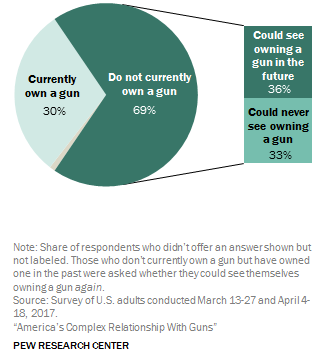

I will primarily be working with two datasets for this analysis.The first is the *NICS Gun Purchase Background Checks* dataset from the [FBI's National Instant Criminal Background Check System](https://www.fbi.gov/about-us/cjis/nics), which was converted from the original xlsx format to CSV using Microsoft Excel. This dataset contains the number of firearm checks done by the FBI from the year 1998 to 2017, sorted by month, state, and gun type. The NICS is used by the Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives.

The other dataset is the *U.S census data*, which contains several variables at the state level. This dataset will be used to supplement the NICS Gun Purchase Background Checks in this analysis.

We are going to be examining some questions from these datasets. These questions include;
- What state has the highest gun sale per capita?
- What state has the lowest gun sale per capita?
- What is the overall trend of permits issued?
- What is the overall trend of gun purchases?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,10)
import seaborn as sns
%matplotlib inline

> Importing the needed Python libraries to be used in this project.
> These include numpy for mathematical functions, pandas for handling data, matplotlib and seaborn for visualization.
> <br> matplotlib is set to inline to enable the visualizations show in this jupyter notebook 

<a id='wrangling'></a>
## Data Wrangling

First we are going to import the datasets that are going to be used in this analysis, and examine their general properties.

### Importing and Checking  General Properties

#### Importing and checking the first dataset.

In [5]:
Gun_data = pd.read_csv (r'C:\Users\PC\Documents\GitHub\ALX-T\Project 01\Datasets\gun_data.csv')
Gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


> This imports and displays the first 5 rows of the dataset.

In this section, we will be working alot with the same set of pandas commands, so it is best we create a function to house these codes to avoid repetition.

In [18]:
def info(df):
    print(df.describe())
    print(df.info())
    print(df.shape)

>This functions provides basic information on any provided dataset.

In [19]:
info(Gun_data)

              permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.00

> This returns basic info on the Gun_data dataset such as;
- summary statistics on the numerical columns in the dataset such as mean, count and max.
- the columns in the dataset, the number of null values they contain, as well as their datatypes.
As may be observed from the above;

There are many columns in the dataset that contain missing values.<br>
The datatype for month and state appear as object also known as string.<br>
The datatype for the month column appears as a string when it should actually be a date datatype.

In [40]:
sum(Gun_data.duplicated())

0

> This shows that there are no duplicate entries in this dataset.

The imported dataset provides information on the number of firearm checks and permits issued by month, state and type.
However, not all categories of background checks may be equally useful to this analysis. <br> According to another [analysis](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html?mtrref=undefined&gwh=A4BFBC202DA1F8E87AF9A3337C7755A4&gwt=pay&assetType=PAYWALL) done by the Newyork Times on this same dataset, sales estimates are calculated from handgun, long gun and multiple-gun background checks, as handguns and long guns represent 1.1 sales, while multiple represents 2 sales. We are also going to apply this guideline to this analysis, as we will also be utilizing sales data. This means that this dataset will eventually need to be trimmed down to include just these needed columns.

The columns from the imported table with which we are concerned include;
- The first column which contains the month each entry was made
- The second column which contains the states from which the firearm permits which were requested and issued were recorded.
- The third column which contains the number of permits issued.
- The fifth, sixth, and eighth columns, which contain data on permit checks made on handguns, long guns and multiple-guns respectively.
 

#### Importing and checking the second dataset.

In [21]:
Census_data = pd.read_csv (r'C:\Users\PC\Documents\GitHub\ALX-T\Project 01\Datasets\U.S. Census Data.csv')
Census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Once again, we are going to use the function created earlier to get basic information on the U.S Census dataset.

In [22]:
info(Census_data)

                                                Fact Fact Note    Alabama  \
count                                             80        28         65   
unique                                            80        15         65   
top     Population estimates, July 1, 2016,  (V2016)       (c)  4,863,300   
freq                                               1         6          1   

       Alaska Arizona Arkansas California Colorado Connecticut Delaware  ...  \
count      65      65       65         65       65          65       65  ...   
unique     64      64       64         63       64          63       64  ...   
top     7.30%  50.30%   50.90%      6.80%    3.30%       0.10%   51.60%  ...   
freq        2       2        2          2        2           2        2  ...   

       South Dakota Tennessee   Texas   Utah Vermont   Virginia Washington  \
count            65        65      65     65      65         65         65   
unique           65        64      64     64      63     

>As may be observed from the above

 - virtually all the columns have missing data 
 - all of the columns are of the string datatype, and need to be fixed later during the cleaning and trimming of this dataset.

And lastly for this section we will check the dataset for duplicate entries

In [15]:
sum(Gun_data.duplicated())

0

> The dataset contains no duplicate entries

This dataset was imported to supply complementary data for this analysis. It contains US census data at the state level, with multiple variables such as; estimated population numbers, total number of persons over 65, etc.

Most of these variables have just one data point per state which are mostly from 2016.

## Data Trimming and Cleaning

### NICS Firearm Background Check Dataset

### Trimming

The first thing we are going to do in this section is trim the  dataset to include only the wanted columns.

In [16]:
Gun_data.drop(['permit_recheck', 'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals'], axis=1, inplace=True)

In [17]:
Gun_data.head()

,month,state,permit,handgun,long_gun,multiple
0,2017-09,Alabama,16717.0,5734.0,6320.0,317
1,2017-09,Alaska,209.0,2320.0,2930.0,160
2,2017-09,Arizona,5069.0,11063.0,7946.0,631
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366
4,2017-09,California,57839.0,37165.0,24581.0,0


>The dataset has been trimmed down to only wanted columns.

Now we check these columns for errors.

### Cleaning

#### Incorrect Datatype

In [18]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   permit    12461 non-null  float64
 3   handgun   12465 non-null  float64
 4   long_gun  12466 non-null  float64
 5   multiple  12485 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 585.4+ KB


As may be observed above, the month column datatype appears as object which is a string instead of datetime.

In [19]:
Gun_data['month'] = pd.to_datetime(Gun_data.month, format = "%Y-%m")

>This fixes this error, and converts the month column to the datetime datatype.

#### Missing Data

Another error that may be observed from the columns is that there are some of them with missing values.

This may lead to problems during exploration and needs to be fixed.

In [20]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   permit    12461 non-null  float64       
 3   handgun   12465 non-null  float64       
 4   long_gun  12466 non-null  float64       
 5   multiple  12485 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 585.4+ KB


>The permit, handgun and long gun columns contain some null values

One simple way of fixing missing data is by inputing them with the mean of the non-null values in the column.

First lets get the mean of the permit column

In [21]:
mean = Gun_data['permit'].mean()
mean

6413.629403739667

Then we use Pandas' fillna function to fill null values with this mean

In [22]:
Gun_data['permit'].fillna(mean, inplace = True)

In [23]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   permit    12485 non-null  float64       
 3   handgun   12465 non-null  float64       
 4   long_gun  12466 non-null  float64       
 5   multiple  12485 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 585.4+ KB


> As may be observed above, the permit column no longer contains any missing data.

This process will now be repeated for the two other columns that contain missing data.

In [24]:
mean = Gun_data['handgun'].mean()
Gun_data['handgun'].fillna(mean, inplace = True)

In [25]:
mean = Gun_data['long_gun'].mean()
Gun_data['long_gun'].fillna(mean, inplace = True)

>All missing data has been filled, and we can now proceed to the next phase of cleaning 

#### Duplicate Data

Although when we checked earlier, the dataset contained no duplicate entries, it would be advisable to check again as there could be duplicates in the selected columns only. 

In [26]:
sum(Gun_data.duplicated())

0

>According to this, there are no duplicates in the dataframe.

This concludes the cleaning and trimming of the first dataset.

###  U.S Census data

### Trimming

Due to the complex nature of this dataset, it will require a whole of cleaning and trimming.

We will start this process by dropping unwanted columns from the dataset.

In [ ]:
Census_data.drop(['Fact Note'], axis=1, inplace=True)

In [31]:
Census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> This drops the Fact Note column which is not needed for this analysis.

We will go further with this trimming by dropping multiple rows from the dataset so as to retrieve the lastest population numbers, which will be needed for answering the research questions which were posed in the abstract. <br> We will create a variable which will house this new dataframe.

In [32]:
mask = Census_data['Fact'] == 'Population estimates, July 1, 2016,  (V2016)'
print(mask)

0      True
1     False
2     False
3     False
4     False
      ...  
80    False
81    False
82    False
83    False
84    False
Name: Fact, Length: 85, dtype: bool


In [34]:
Census_data_population = Census_data[Census_data['Fact'] == 'Population estimates, July 1, 2016,  (V2016)']
Census_data_population.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


> The latest population numbers we could retrieve from the US census dataset was from 2016 which is now stored in the variable Census_data_population

In order to avoid issues when visualizing the data it is best the Fact column is also dropped. 

In [ ]:
Census_data_population.drop(['Fact'], axis=1, inplace=True)

It will however be very difficult to visualize this dataframe in it's current state. we will need to set the states as the index for the dataframe to make visualization possible. This will be achieved using the pandas Transpose function, and save the dataframe in a new variable.

In [36]:
Census_data_new = Census_data_population.T

In [37]:
print(Census_data_new)

                         0
Alabama          4,863,300
Alaska             741,894
Arizona          6,931,071
Arkansas         2,988,248
California      39,250,017
Colorado         5,540,545
Connecticut      3,576,452
Delaware           952,065
Florida         20,612,439
Georgia         10,310,371
Hawaii           1,428,557
Idaho            1,683,140
Illinois        12,801,539
Indiana          6,633,053
Iowa             3,134,693
Kansas           2,907,289
Kentucky         4,436,974
Louisiana        4,681,666
Maine            1,331,479
Maryland         6,016,447
Massachusetts    6,811,779
Michigan         9,928,300
Minnesota        5,519,952
Mississippi      2,988,726
Missouri         6,093,000
Montana          1,042,520
Nebraska         1,907,116
Nevada           2,940,058
New Hampshire    1,334,795
New Jersey       8,944,469
New Mexico         2081015
New York          19745289
North Carolina    10146788
North Dakota        757952
Ohio              11614373
Oklahoma           3923561
O

> The row has been converted into a column and the new data frame is saved in Census_data_new

Let us now give this new columns  appropriate names

In [35]:
Census_data_new.columns = ['population']

In [36]:
Census_data_new = Census_data_new.rename({'': 'state'}, axis=1)

In [40]:
Census_data_new.head()

,state,population
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


> Both columns have been named appropriately.

Now that all unwanted columns have been removed, and all other issues sorted, we can proceed with the cleaning phase.

### Cleaning

In [194]:
Census_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       50 non-null     object
 1   population  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


> The dataframe seems to be clean, with all rows intact, and in the right datatype.

Now that both datasets have cleaned and trimmed, we can now proceed to the exploratory analysis section of this report.

<a id='eda'></a>
## <u>Exploratory Data Analysis

In this section, we will answer the research questions that were posed in the abstract of this analysis. However, before delving into this, let us first get a histogram of all the numerical variables in the datasets.

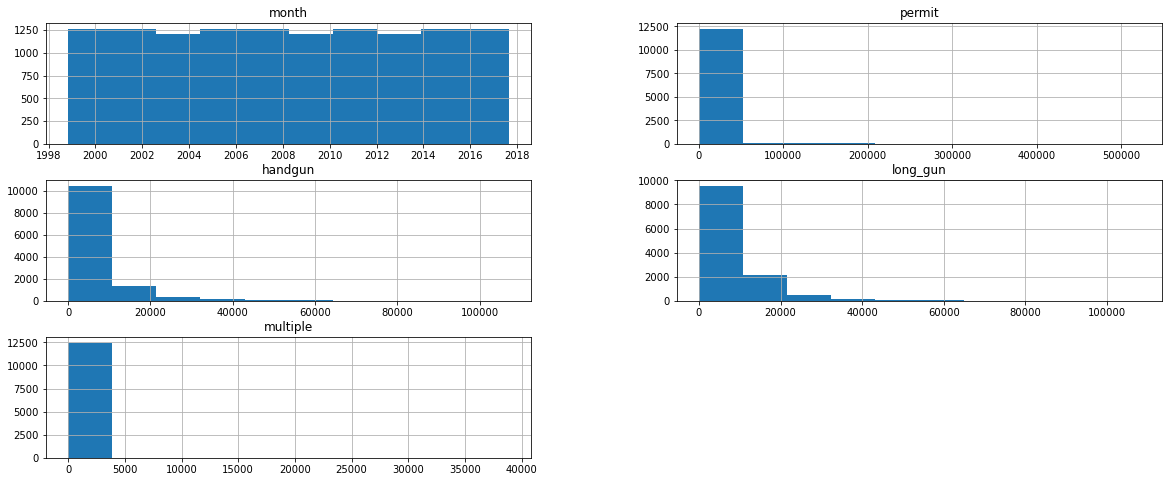

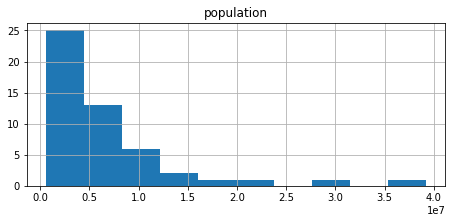

In [49]:
Gun_data.hist(figsize=(20, 8));
Census_data_new.hist(figsize=(7.5, 3));

### Question I & II : What states have the lowest and highest gun sale per capita?

In ascertaining what states have the lowest and highest gun sales per capita, we will need to utilize the census data from where we will be comparing the latest population numbers with corresponding gun data from the NICS Firearm Background Check Dataset. 

In [50]:
Census_data_new.head()

,state,population
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


we will need to compare this census data with gun data from the year 2016. To retrieve the needed gun data we will use pandas to create a dataframe consisting of only the wanted columns.

In [51]:
Gun_data_2016 = Gun_data[Gun_data['month'] == '2016']

>Gun data from 2016 retrieved

In [52]:
gun_data_new = Gun_data_2016.groupby(['state']).sum().reset_index()
gun_data_new.head()

,state,permit,handgun,long_gun,multiple
0,Alabama,27242.0,25445.0,14785.0,884
1,Alaska,192.0,2859.0,2245.0,164
2,Arizona,3898.0,15745.0,8512.0,575
3,Arkansas,3670.0,7954.0,5982.0,340
4,California,127715.0,52139.0,32970.0,0


> Gun data from 2016 grouped by state.

Let us get a simple visualization of these variables.

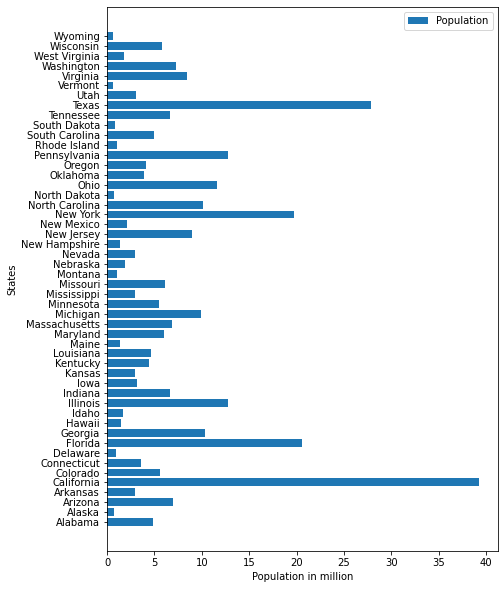

In [61]:
plt.barh(Census_data_new.state, Census_data_n.population / 10**6)
plt.legend(['Population'])
plt.xlabel('Population in million')
plt.ylabel('States')
plt.show()

> Visualization of the population per state in millions using an horizontal bar graph.

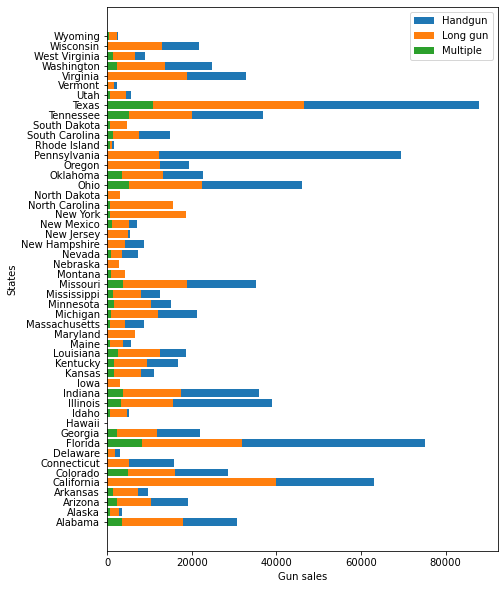

In [101]:
plt.barh(gun_data_new.state, gun_data_new.handgun * 1.1)
plt.barh(gun_data_new.state, gun_data_new.long_gun * 1.1)
plt.barh(gun_data_new.state, gun_data_new.multiple * 2)
plt.legend(['Handgun', 'Long gun', 'Multiple'])
plt.xlabel('Gun sales')
plt.ylabel('States')
plt.show()

> Visualization of gun sales per state for handgun, long gun and multiple purchases. 
<br> The multiple column was multiplied by 2 as it was stated in the analysis of this same dataset by the [Newyork Times](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html?mtrref=undefined&gwh=A4BFBC202DA1F8E87AF9A3337C7755A4&gwt=pay&assetType=PAYWALL) that each entry in the multiple column counts as 2 sales, while each entry in the the handgun and long gun columns count as 1.1 sales.

To compare the dataframes, let us get the percentage of the total population, that the total gun sales represents. 
<br>However before getting the total of the gun sales, we need to multiply the handgun and long gun columns by 1.1 and the multiple column by 2 as stated earlier.

In [66]:
gun_data_new['handgun'] = gun_data_new['handgun'].multiply(1.1)

In [68]:
gun_data_new['long_gun'] = gun_data_new['long_gun'].multiply(1.1)

In [69]:
gun_data_new['multiple'] = gun_data_new['multiple'].multiply(2)

Then we add a new column to the gds dataframe 'Total' containing the total of the handgun long gun and multiple columns

In [70]:
gun_data_new['Total'] = gun_data_new['handgun'] + gun_data_new['long_gun'] + gun_data_new['multiple']

Now we get our percentage

In [91]:
Census_data_new['percentage_difference'] = gun_data_new['Total'] / Census_data_new['population']

In [92]:
Census_data_new['percentage_difference'] = Census_data_new['percentage_difference'].multiply(100)

In [95]:
total_gun_sales = gun_data_new["Total"]
Census_data_new = Census_data_n.join(total_gun_sales)

In [97]:
Census_data_new = Census_data_new[['state', 'population', 'Total', 'percentage_difference']]

In [99]:
Census_data_new.rename(columns = {'Total':'total_gun_sales'}, inplace = True)

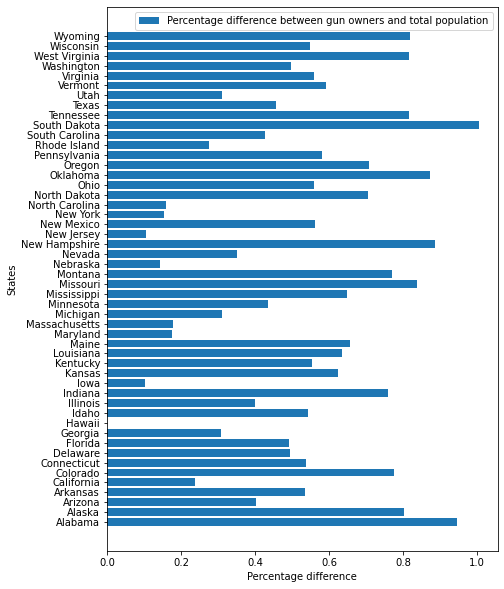

In [94]:
plt.barh(Census_data_new.state, Census_data_new.percentage_difference)
plt.legend(['Percentage difference between gun owners and total population'])
plt.xlabel('Percentage difference')
plt.ylabel('States')
plt.show()

>Visualization of the percentage difference between population and total gun sales.

Using the above bar chart to answer the first 2 research questions.
 - What state has the highest gun sales per capita? <br>
 This would appear to be South Dakota with a gun sale to population percentage of 1.005%.
 
 
 - What state has the lowest gun sales per capita? <br>
This would appear to be Hawaii which has a gun sale to population percentage of 0.00%. This is due to the lack of any permit checks for handguns long guns or multiple in that state.

### Question III: What is the overall trend of permits issued?

This is a very straight forward variable to plot. All we need do is set the number of permits issued for the first year at 100%, then get progression of growth over the rest of the years.

In [332]:
Gun_data_permits = Gun_data.groupby(['month']).sum().reset_index()
Gun_data_permits.head()

,month,permit,handgun,long_gun,multiple
0,1998-11-01,2073.0,6859.000000,11909.000000,275
1,1998-12-01,76096.0,219080.881107,578692.847585,8445
2,1999-01-01,77072.0,190436.881107,317725.847585,7498
3,1999-02-01,84759.0,238388.881107,360221.847585,9226
4,1999-03-01,103185.0,246976.881107,384585.847585,9537


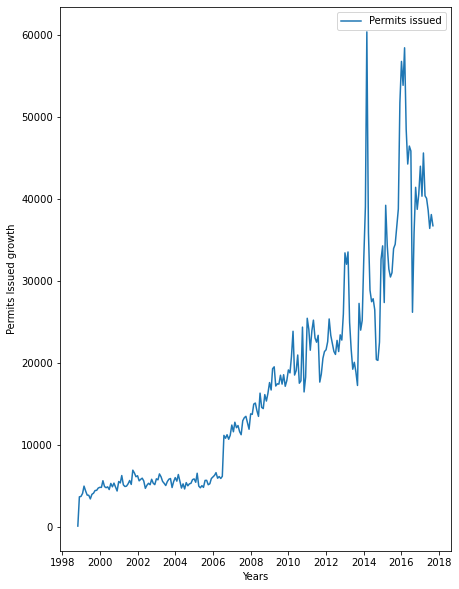

In [349]:
plt.plot(Gun_data_permits.month, Gun_data_permits.permit / Gun_data_permits.permit.iloc[0] * 100)
plt.legend(['Permits issued'])
plt.xlabel('Years')
plt.ylabel('Permits Issued growth')
plt.show()

> This shows the growth of permits issued for gun ownership in the US from 1998 to 2018.

### Question IIII : What is the overall trend of gun purchases?

As earlier stated, for the sake of this analysis, only the columns containing permit checks for the handgun, long gun, and multiple guns will be considered as gun sales. And so, in tackling this research question, all we need to do is examine the progression of the sum of these three variables over time frame provided for us in the dataset.

In [ ]:
Gun_data_year = Gun_data.groupby('month').sum().reset_index()
Gun_data_year['Sum'] = Gun_data_year['handgun'] + Gun_data_year['long_gun'] + Gun_data_year['multiple']

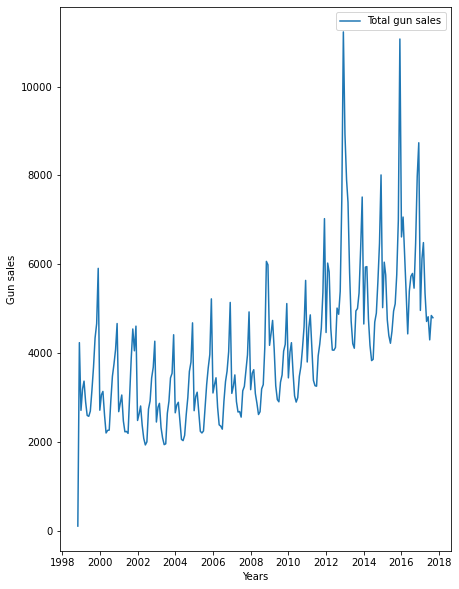

In [361]:
plt.plot(Gun_data_year.month, Gun_data_year.Sum / Gun_data_year.Sum.iloc[0] * 100 )
plt.legend(['Total gun sales'])
plt.xlabel('Years')
plt.ylabel('Gun sales')
plt.show()

> This shows the growth of gun sales in the US from 1998 to 2018.

<a id='conclusions'></a>
## <u>Conclusions

This report was primarily aimed at drawing out key insight from the NICS Firearm Background Check Dataset, while also utilizing data from the U.S Census data to gain further useful information. The report tracks the progression of variables such gun sales, gun permits issued etc, from the year 1998 to 2018. In order to draw out these variables, research questions were asked at the beginning of this analysis which were subsequently answered as the report progressed.  Outside of the research questions posed, I also made other findings such as;
 - handguns are the most sought after firearm of choice in every state of the U.S.,
 - as at 2016, california had the largest population of any U.S state at 39,250,017, and Wyoming had the lowest at 585,501,
 <br> amongst others. 
 

 
 ## <u>Limitations
 As we all know, all reports have limitations as regards datasets, the accuracy of available data, limited scope of available data etc. <br>
 One major limitation of this report was missing values in the available datasets which were filled with a mean of the non null values. This definitely was not the best way to go about solving this problem, but due to limited time in which I had to complete this project, it had to suffice. <br>
 
 Also the method used to retrieve the data on gun sales was not exactly coventional, and was obtained using permits checks done on handguns, long guns, and multiple gun checks.

## <u>Sources

 - https://github.com/nytimes/gunsales#getting-gun-sales-estimates-from-background-checks
 - https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md
 - https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/scripts/chart-total-checks-all.py
 - https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html?mtrref=undefined&gwh=A4BFBC202DA1F8E87AF9A3337C7755A4&gwt=pay&assetType=PAYWALL
 - https://www.fbi.gov/services/cjis/nics
 - https://www.pewresearch.org/social-trends/2017/06/22/the-demographics-of-gun-ownership/